In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from utils2 import *
import umap

### AUTORELOAD
%load_ext autoreload
%autoreload 2

In [2]:
# data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out.csv')
data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out_perc.csv')

In [3]:
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
preference_metrics_perc = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_meat', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']
demographic_metrics = ['id_client', 'frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']

In [4]:
preference = data[preference_metrics]
preference_perc = data[preference_metrics_perc]
demographic = data[demographic_metrics]

# Preference Clustering

Scale the data

In [5]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [6]:
pref_no_scl = preference.copy()
pref_st_scl = standard.fit_transform(preference)
pref_mm_scl = minmax.fit_transform(preference)
pref_rb_scl = robust.fit_transform(preference)

In [7]:
preference_no_scl = preference.copy()
preference_no_scl[preference_metrics] = pref_no_scl

preference_st_scl = preference.copy()
preference_st_scl[preference_metrics] = pref_st_scl

preference_mm_scl = preference.copy()
preference_mm_scl[preference_metrics] = pref_mm_scl

preference_rb_scl = preference.copy()
preference_rb_scl[preference_metrics] = pref_rb_scl

# K-Means

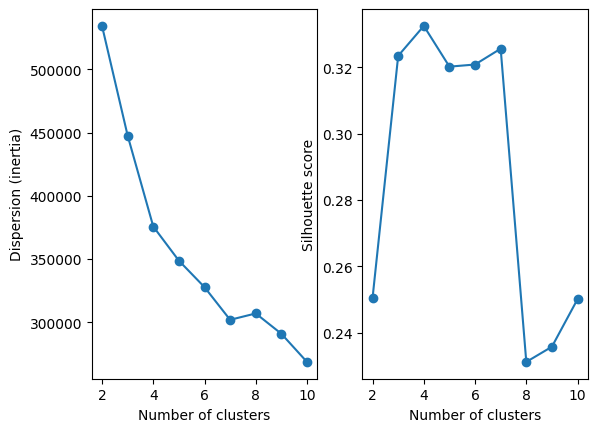

In [ ]:
plot_inertia_and_silhouette(preference_st_scl.sample(frac=0.4, random_state=1), 2, 10)

In [94]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans4'] = kmeans.predict(preference_st_scl)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_19612\3073901588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preference['st_kmeans4'] = kmeans.predict(preference_st_scl)


In [95]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans7'] = kmeans.predict(preference_st_scl)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_19612\3363836504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preference['st_kmeans7'] = kmeans.predict(preference_st_scl)


In [96]:
groupby_mean(preference, 'st_kmeans4')

st_kmeans4,0,1,2,3,data
beer,45.96,85.30,136.56,45.31,58.82
bottled_water,44.83,84.07,57.09,44.73,57.52
bread,30.47,30.41,197.29,22.06,28.44
meat,1.77,1.44,311.77,1.20,2.69
dairy,30.91,30.67,318.45,77.06,46.55
fresh_foods,109.33,33.92,208.96,32.74,61.12
frozen_foods,65.10,112.85,281.68,33.04,71.22
fruit_beverages,96.41,21.27,150.49,20.57,48.35
pastry,63.47,31.68,52.90,55.87,50.75
sodas,34.32,34.21,400.10,33.84,35.55


In [97]:
groupby_mean(preference, 'st_kmeans7')

st_kmeans7,0,1,2,3,4,5,6,data
beer,45.64,85.32,46.07,46.19,45.27,151.65,110.68,58.82
bottled_water,44.89,84.09,45.31,44.87,44.66,57.38,55.90,57.52
bread,30.04,30.33,28.54,30.64,16.65,79.36,422.41,28.44
meat,1.26,1.40,2.14,2.16,1.03,330.56,274.84,2.69
dairy,31.27,30.51,83.99,31.26,82.44,474.20,88.88,46.55
fresh_foods,91.29,33.68,34.90,109.84,32.17,201.39,221.32,61.12
frozen_foods,32.79,112.50,34.38,85.52,33.46,337.93,175.36,71.22
fruit_beverages,77.88,21.11,21.82,97.51,20.35,162.34,121.96,48.35
pastry,116.25,31.34,62.25,31.34,38.21,54.65,50.05,50.75
sodas,34.05,33.96,35.68,34.38,33.38,528.48,230.67,35.55


-----

# Hierarchical

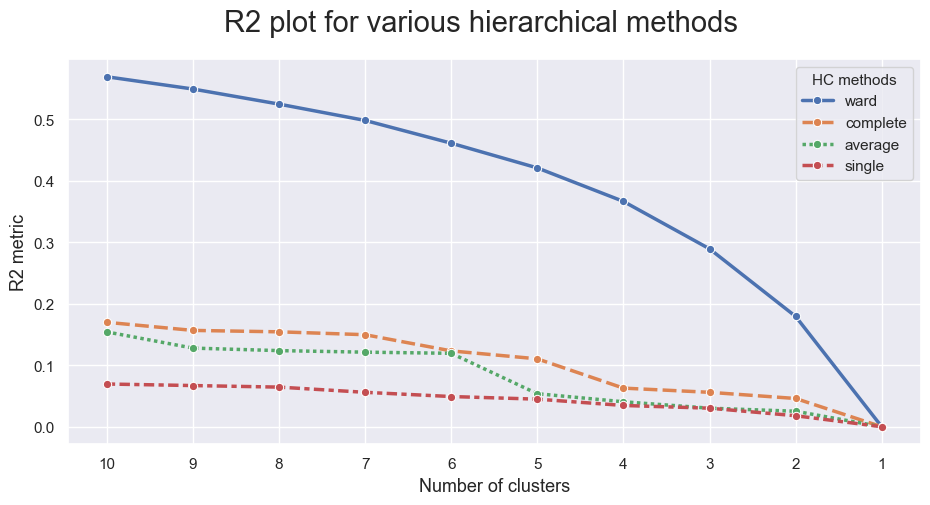

In [16]:
plot_r2_linkage(preference_st_scl.sample(frac=0.2, random_state=1), 10)

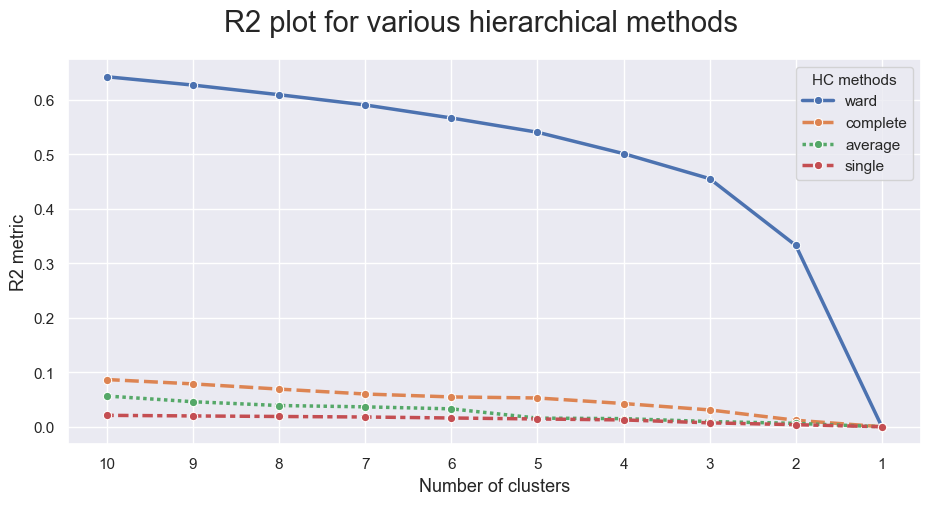

In [17]:
plot_r2_linkage(preference_mm_scl.sample(frac=0.2, random_state=1), 10)

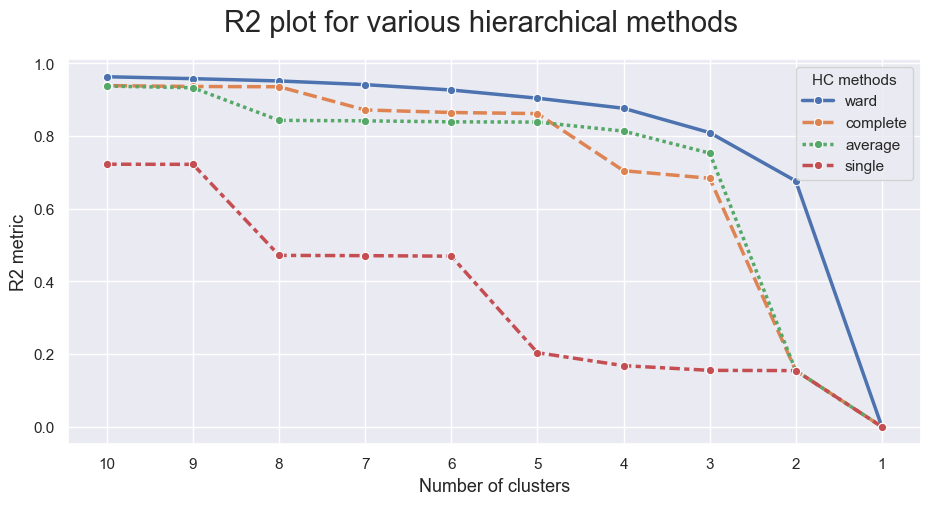

In [18]:
plot_r2_linkage(preference_rb_scl.sample(frac=0.2, random_state=1), 10)

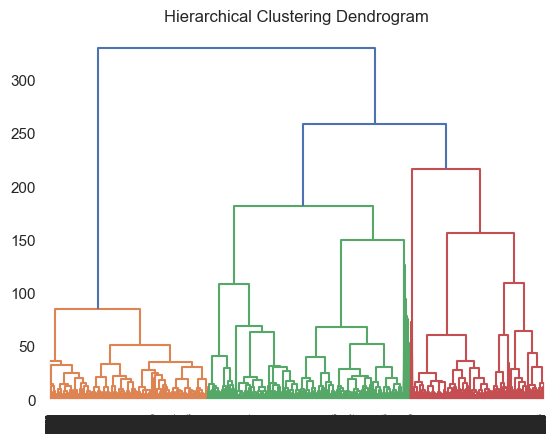

In [19]:
plot_dendrogram(preference_st_scl.sample(frac=0.2, random_state=1), 'ward')

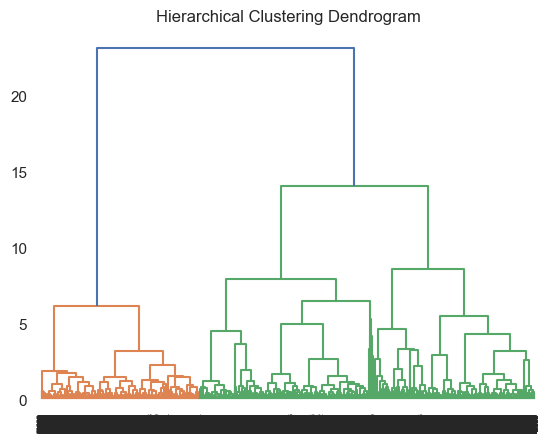

In [20]:
plot_dendrogram(preference_mm_scl.sample(frac=0.2, random_state=1), 'ward')

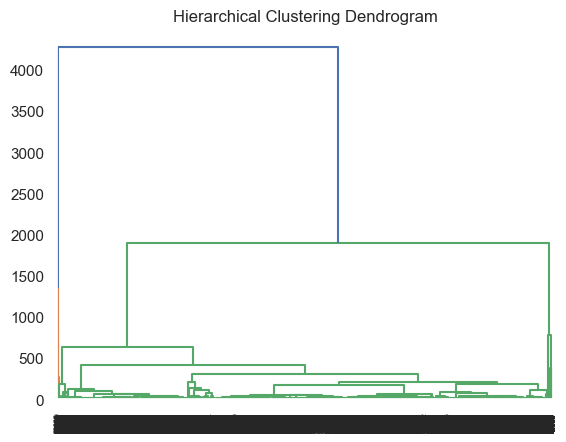

In [21]:
plot_dendrogram(preference_rb_scl.sample(frac=0.2, random_state=1), 'ward')

Robust scaling tends to give poor results... giving a huge cluster and very small other clusters

In [9]:
# We need a sample since there is not enough memory to run the hierarchical clustering on the whole dataset
smp = preference_st_scl.sample(frac=0.2, random_state=1)
smp_orig = preference.sample(frac=0.2, random_state=1)

In [10]:
smp_orig['st_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(smp)

In [11]:
groupby_mean(smp_orig, 'st_ward5')

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc["Counts"] = counts


st_ward5,0,1,2,3,4,data
beer,151.66,45.92,84.49,47.57,45.29,58.74
bottled_water,56.09,45.43,83.78,45.37,44.73,57.46
bread,256.62,20.27,30.44,30.69,29.63,28.40
meat,305.55,0.98,1.14,3.93,0.71,2.70
dairy,341.19,82.15,30.42,32.91,34.56,46.73
fresh_foods,208.24,33.94,33.85,109.96,84.49,61.03
frozen_foods,264.95,34.29,109.21,89.60,32.18,70.83
fruit_beverages,145.88,21.24,21.15,96.69,72.39,48.14
pastry,54.91,42.06,31.77,32.79,115.66,50.51
sodas,428.61,33.11,34.80,35.51,32.39,35.42


In [12]:
smp_orig['st_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(smp)

In [13]:
groupby_mean(smp_orig, 'st_ward3')

st_ward3,0,1,2,data
beer,46.29,151.66,84.49,58.74
bottled_water,45.22,56.09,83.78,57.46
bread,26.28,256.62,30.44,28.40
meat,1.88,305.55,1.14,2.70
dairy,52.82,341.19,30.42,46.73
fresh_foods,72.93,208.24,33.85,61.03
frozen_foods,51.98,264.95,109.21,70.83
fruit_beverages,60.20,145.88,21.15,48.14
pastry,59.20,54.91,31.77,50.51
sodas,33.71,428.61,34.80,35.42


In [14]:
smp_orig['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(smp)

In [15]:
groupby_mean(smp_orig, 'st_ward4')

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc["Counts"] = counts


st_ward4,0,1,2,3,data
beer,46.53,151.66,84.49,45.92,58.74
bottled_water,45.08,56.09,83.78,45.43,57.46
bread,30.21,256.62,30.44,20.27,28.40
meat,2.47,305.55,1.14,0.98,2.70
dairy,33.66,341.19,30.42,82.15,46.73
fresh_foods,98.40,208.24,33.85,33.94,61.03
frozen_foods,63.54,264.95,109.21,34.29,70.83
fruit_beverages,85.66,145.88,21.15,21.24,48.14
pastry,70.40,54.91,31.77,42.06,50.51
sodas,34.09,428.61,34.80,33.11,35.42


In [16]:
clusters_comparison(smp_orig, 'st_ward5', 'st_ward4')

,st_ward4 0 Cluster,st_ward4 1 Cluster,st_ward4 2 Cluster,st_ward4 3 Cluster
st_ward5 0 Cluster,0,85,0,0
st_ward5 1 Cluster,0,0,0,6598
st_ward5 2 Cluster,0,0,7768,0
st_ward5 3 Cluster,5515,0,0,0
st_ward5 4 Cluster,4583,0,0,0


In [17]:
clusters_comparison(smp_orig, 'st_ward5', 'st_ward3')

,st_ward3 0 Cluster,st_ward3 1 Cluster,st_ward3 2 Cluster
st_ward5 0 Cluster,0,85,0
st_ward5 1 Cluster,6598,0,0
st_ward5 2 Cluster,0,0,7768
st_ward5 3 Cluster,5515,0,0
st_ward5 4 Cluster,4583,0,0


In [18]:
clusters_comparison(smp_orig, 'st_ward4', 'st_ward3')

,st_ward3 0 Cluster,st_ward3 1 Cluster,st_ward3 2 Cluster
st_ward4 0 Cluster,10098,0,0
st_ward4 1 Cluster,0,85,0
st_ward4 2 Cluster,0,0,7768
st_ward4 3 Cluster,6598,0,0


In [47]:
smp_orig['st_ward5'].value_counts()

st_ward5
4    7847
0    6558
2    5507
1    4586
3      42
Name: count, dtype: int64

In [48]:
smp_orig['st_ward4'].value_counts()

st_ward4
0    10093
1     7847
2     6558
3       42
Name: count, dtype: int64

In [49]:
smp_orig['st_ward3'].value_counts()

st_ward3
0    10135
1     7847
2     6558
Name: count, dtype: int64

# Compare test

In [8]:
from sklearn.base import clone

## Some functions we need
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


In [9]:
def get_r2_df(df, feats, kmeans_model, hierar_model):
  # Obtaining the R² scores for each cluster solution

  r2_scores = {}
  r2_scores['kmeans'] = get_r2_scores(df[feats], kmeans_model)

  for linkage in ['complete', 'average', 'single', 'ward']:
      r2_scores[linkage] = get_r2_scores(
          df[feats], hierar_model.set_params(linkage=linkage)
      )

  return pd.DataFrame(r2_scores)

In [10]:
def plot_r2_scores(r2_scores,
                   plot_title="Preference Variables:\nR² plot for various clustering methods\n",
                   legend_title="Cluster methods"):
  # Visualizing the R² scores for each cluster solution on demographic variables
  pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

  plt.title(plot_title, fontsize=21)
  plt.legend(title=legend_title, title_fontsize=11)
  plt.xlabel("Number of clusters", fontsize=13)
  plt.ylabel("R² metric", fontsize=13)
  plt.show()

In [11]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)

hierarchical = AgglomerativeClustering(metric='euclidean')

In [12]:
smp = preference_st_scl.sample(frac=0.2, random_state=1)
smp_orig = preference.sample(frac=0.2, random_state=1)

In [13]:
demog_r2_scores = get_r2_df(smp, preference_metrics, kmeans, hierarchical)
demog_r2_scores

,kmeans,complete,average,single,ward
2,0.176049,0.048850,0.045462,0.016811,0.164629
3,0.301977,0.107143,0.049207,0.049207,0.285833
4,0.416004,0.116155,0.084098,0.051366,0.387226
5,0.457385,0.169172,0.128282,0.059260,0.437869
6,0.496877,0.174781,0.130441,0.064994,0.477108
7,0.535721,0.184042,0.132329,0.068645,0.514901
8,0.557773,0.208795,0.151580,0.071646,0.541589
9,0.580423,0.210447,0.153282,0.076663,0.560923


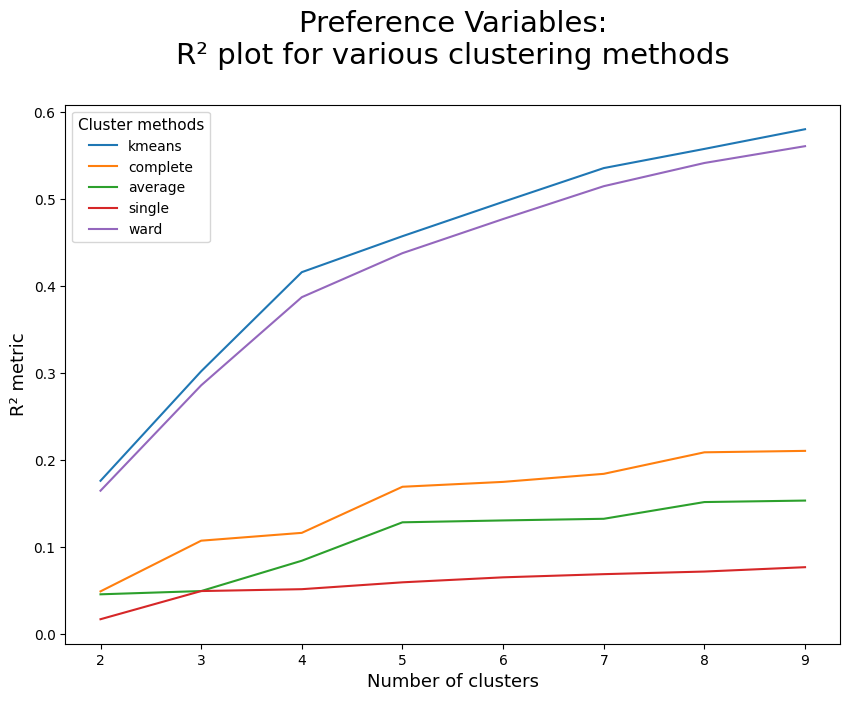

In [14]:
plot_r2_scores(demog_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering

In [24]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10,  random_state = 1).fit(smp)
smp_orig['st_kmeans4'] = kmeans.predict(smp)

In [25]:
smp_orig['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(smp)

In [26]:
clusters_comparison(smp_orig, 'st_kmeans4', 'st_ward4')

,st_ward4 0 Cluster,st_ward4 1 Cluster,st_ward4 2 Cluster,st_ward4 3 Cluster
st_kmeans4 0 Cluster,91,6,7700,90
st_kmeans4 1 Cluster,8578,1,40,53
st_kmeans4 2 Cluster,1415,1,27,6455
st_kmeans4 3 Cluster,14,77,1,0


In [33]:
groupby_mean(smp_orig, 'st_kmeans4')

st_kmeans4,0,1,2,3,data
beer,85.16,46.01,45.29,149.23,58.74
bottled_water,84.04,44.90,44.74,55.10,57.46
bread,30.49,30.32,21.88,225.79,28.40
meat,1.49,1.80,1.08,328.64,2.70
dairy,30.57,30.83,76.86,343.86,46.73
fresh_foods,34.30,109.27,32.79,230.75,61.03
frozen_foods,112.75,64.85,32.91,295.86,70.83
fruit_beverages,21.12,96.68,20.60,154.08,48.14
pastry,31.67,63.39,55.11,55.37,50.51
sodas,34.28,34.16,33.67,401.57,35.42


0: beer + bottled_water + frozen_foods

1: fresh_foods + fruit_beverages + low wines

2: normal people

3: spenders

In [30]:
groupby_mean(smp_orig, 'st_ward4')

st_ward4,0,1,2,3,data
beer,46.53,151.66,84.49,45.92,58.74
bottled_water,45.08,56.09,83.78,45.43,57.46
bread,30.21,256.62,30.44,20.27,28.40
meat,2.47,305.55,1.14,0.98,2.70
dairy,33.66,341.19,30.42,82.15,46.73
fresh_foods,98.40,208.24,33.85,33.94,61.03
frozen_foods,63.54,264.95,109.21,34.29,70.83
fruit_beverages,85.66,145.88,21.15,21.24,48.14
pastry,70.40,54.91,31.77,42.06,50.51
sodas,34.09,428.61,34.80,33.11,35.42


0: fresh_foods + fruit_beverages + pastry + low_wines

1: spenders

2: beer + bottled_water + frozen_foods

3: normal people

In [34]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=10,  random_state = 1).fit(smp)
smp_orig['st_kmeans7'] = kmeans.predict(smp)

In [35]:
smp_orig['st_ward7'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 7
    ).fit_predict(smp)

In [36]:
clusters_comparison(smp_orig, 'st_kmeans7', 'st_ward7')

,st_ward7 0 Cluster,st_ward7 1 Cluster,st_ward7 2 Cluster,st_ward7 3 Cluster,st_ward7 4 Cluster,st_ward7 5 Cluster,st_ward7 6 Cluster
st_kmeans7 0 Cluster,37,0,28,2392,28,2,55
st_kmeans7 1 Cluster,61,1,30,17,4176,0,5
st_kmeans7 2 Cluster,71,0,7682,64,1,2,9
st_kmeans7 3 Cluster,0,2,0,0,0,34,0
st_kmeans7 4 Cluster,5321,0,23,10,11,2,26
st_kmeans7 5 Cluster,11,42,0,0,0,0,0
st_kmeans7 6 Cluster,14,0,5,132,367,0,3888


In [37]:
groupby_mean(smp_orig, 'st_kmeans7')

C:\Users\ritaf\AppData\Local\Temp\ipykernel_19612\2515769081.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc["Counts"] = counts


st_kmeans7,0,1,2,3,4,5,6,data
beer,46.28,45.76,85.14,128.39,46.03,167.30,45.34,58.74
bottled_water,45.54,44.89,84.04,58.44,44.94,53.58,44.72,57.46
bread,28.81,29.91,30.23,465.44,30.56,86.47,16.51,28.40
meat,2.15,1.52,1.36,272.25,1.91,355.26,1.04,2.70
dairy,83.66,31.27,30.35,80.58,31.04,530.11,82.68,46.73
fresh_foods,35.80,90.73,33.89,236.56,109.47,224.64,32.20,61.03
frozen_foods,34.06,32.61,112.36,163.22,85.12,371.87,33.60,70.83
fruit_beverages,22.05,77.59,20.93,107.36,97.42,177.60,20.52,48.14
pastry,61.18,116.45,31.27,49.17,31.36,58.96,37.66,50.51
sodas,36.72,33.46,33.82,217.81,34.37,531.26,33.24,35.42


0: wine + veggies

1: pastry + low wines

2: beer + bottled_water + frozen_foods

3: spenders (especially bread)

4: fresh_foods + fruit_beverages + low wines

5: spenders (especially dairy)

6: normal people

In [38]:
groupby_mean(smp_orig, 'st_ward7')

C:\Users\ritaf\AppData\Local\Temp\ipykernel_19612\2515769081.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc["Counts"] = counts


st_ward7,0,1,2,3,4,5,6,data
beer,47.57,183.87,84.49,46.60,45.29,115.42,45.47,58.74
bottled_water,45.37,53.60,83.78,46.50,44.73,58.90,44.73,57.46
bread,30.69,121.29,30.44,27.60,29.63,408.88,15.46,28.40
meat,3.93,363.73,1.14,0.81,0.71,240.10,1.09,2.70
dairy,32.91,592.82,30.42,81.50,34.56,58.10,82.58,46.73
fresh_foods,109.96,211.51,33.85,34.84,84.49,204.55,33.35,61.03
frozen_foods,89.60,369.60,109.21,34.43,32.18,147.22,34.20,70.83
fruit_beverages,96.69,179.53,21.15,21.50,72.39,108.02,21.07,48.14
pastry,32.79,60.13,31.77,59.35,115.66,49.02,30.71,50.51
sodas,35.51,663.02,34.80,33.21,32.39,164.90,33.05,35.42


0: fresh_foods + fruit_beverage + low wines

1: spenders (especialy dairy and sodas)

2: beer + bottled_water + frozen_foods

3: veggies + wines

4: pastry

5: spenders (especially bread)

6: normal people

In [83]:
umap_object = umap.UMAP(random_state=1)

In [84]:
umap_embedding = umap_object.fit_transform(smp_orig)

c:\Users\ritaf\anaconda3\envs\datamining\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


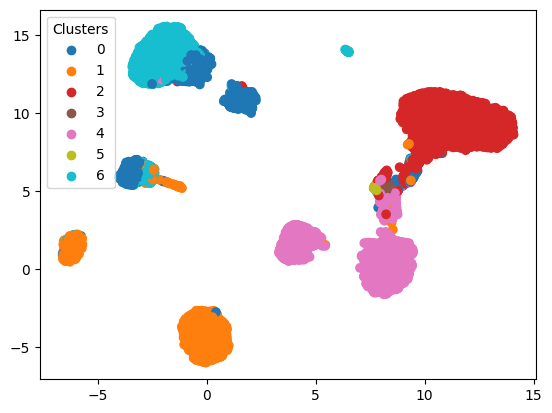

In [59]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_kmeans4'])

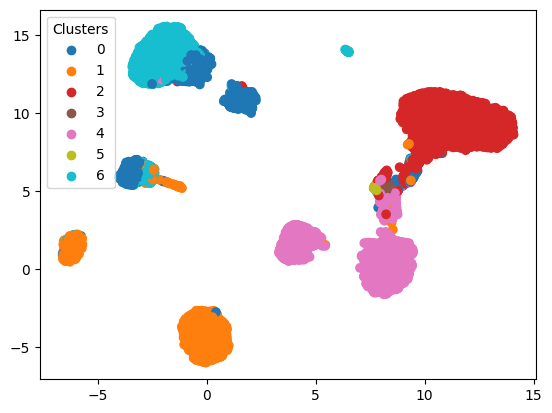

In [ ]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_kmeans7'])

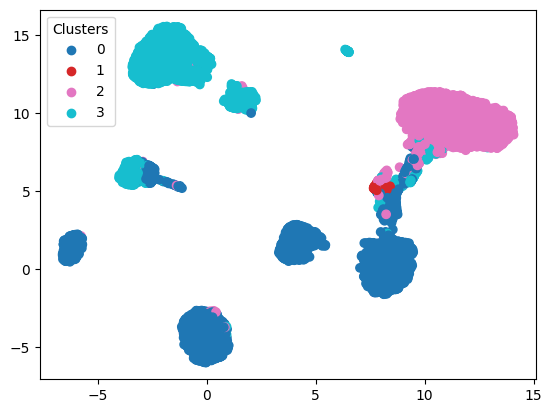

In [60]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_ward4'])

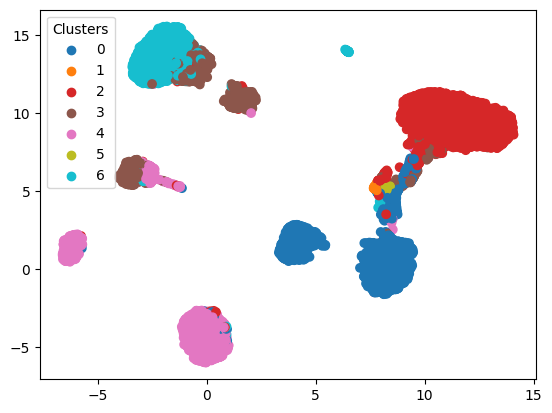

In [61]:
visualize_dimensionality_reduction(umap_embedding, smp_orig['st_ward7'])